## How are in-demand Skills trending for Data Analysts?

### Import Libraries and Data

In [140]:
# Importing libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading dataset
df=pd.read_csv('C:/Users/Admin/Downloads/job_postings.csv')

# Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else(x))

### Group the Skills by Month

In [ ]:
# skill count per month for data analysts
df_DA=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='India')].copy()

df_DA['job_posted_month_no']=df_DA['job_posted_date'].dt.month

df_DA_exploded=df_DA.explode('job_skills')

In [ ]:
# group by month and job skills
df_DA_pivot=df_DA_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,arch,asana,asp.net,assembly,atlassian,...,vmware,vue.js,webex,windows,wire,word,workfront,wrike,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,8,0,21,0,2,0,0,0,1,0,...,4,0,0,4,0,24,0,0,1,1
2,8,0,19,1,0,0,0,0,2,2,...,0,0,0,1,1,14,1,0,0,3
3,4,0,11,2,0,2,2,0,0,1,...,1,0,1,8,0,20,1,0,0,5
4,9,0,10,1,1,1,0,0,0,0,...,1,0,0,5,0,11,1,0,1,1
5,4,1,18,0,0,0,0,0,1,0,...,1,0,0,3,0,19,0,0,0,2
6,4,0,16,2,0,0,0,0,0,1,...,1,1,1,7,0,17,0,1,1,1
7,0,0,14,2,0,1,0,1,0,0,...,0,0,0,3,0,20,0,1,1,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,22,0,0,0,0
9,2,0,5,0,0,0,0,0,0,0,...,0,0,0,1,0,18,1,0,0,0


In [ ]:
# sort by count
df_DA_pivot.loc['Total']=df_DA_pivot.sum()

df_DA_pivot=df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_pivot=df_DA_pivot.drop('Total')

df_DA_pivot

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,snowflake,...,drupal,firestore,node,notion,monday.com,next.js,rshiny,trello,vue.js,wire
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,307,220,191,149,105,106,62,44,33,20,...,0,0,0,0,0,0,0,0,0,0
2,371,245,203,173,133,109,78,62,59,31,...,0,0,0,1,0,1,0,0,0,1
3,346,266,199,189,160,144,78,51,48,20,...,0,0,0,0,1,0,1,0,0,0
4,222,175,140,117,111,86,42,37,36,20,...,0,0,0,0,0,0,0,0,0,0
5,229,175,154,128,106,69,42,38,43,22,...,0,0,0,0,0,0,0,0,0,0
6,245,174,149,137,119,79,62,42,38,28,...,0,0,0,0,0,0,0,1,1,0
7,302,235,175,187,162,107,72,56,41,30,...,1,1,1,0,0,0,0,0,0,0
8,214,170,78,172,153,88,100,22,0,44,...,0,0,0,0,0,0,0,0,0,0
9,149,111,80,115,85,73,70,16,7,24,...,0,0,0,0,0,0,0,0,0,0


### Plot the Monthly Skill Counts

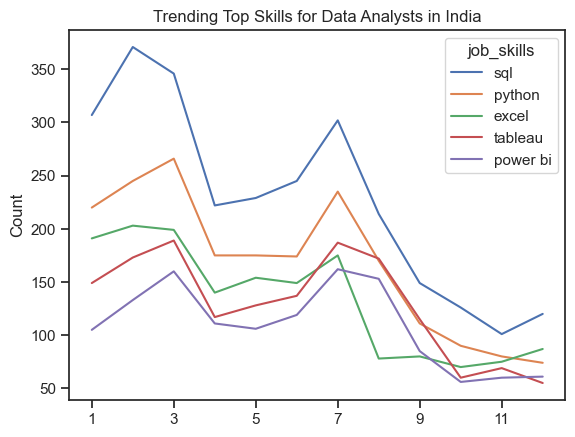

In [144]:
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in India')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

### Calculate Percentage of Total Jobs

In [145]:
DA_totals=df_DA.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     535
2     620
3     629
4     412
5     413
6     415
7     508
8     325
9     244
10    242
11    192
12    218
dtype: int64

In [ ]:
df_DA_percent=df_DA_pivot.iloc[:12].div(DA_totals/100, axis=0)

# change month to month name
df_DA_pivot=df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month']=df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot=df_DA_pivot.set_index('job_posted_month')
df_DA_pivot=df_DA_pivot.drop(columns='job_posted_month_no')

df_DA_percent

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,snowflake,...,drupal,firestore,node,notion,monday.com,next.js,rshiny,trello,vue.js,wire
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,57.383178,41.121495,35.700935,27.850467,19.626168,19.813084,11.588785,8.224299,6.168224,3.738318,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
2,59.838710,39.516129,32.741935,27.903226,21.451613,17.580645,12.580645,10.000000,9.516129,5.000000,...,0.00000,0.00000,0.00000,0.16129,0.000000,0.16129,0.000000,0.000000,0.000000,0.16129
3,55.007949,42.289348,31.637520,30.047695,25.437202,22.893482,12.400636,8.108108,7.631161,3.179650,...,0.00000,0.00000,0.00000,0.00000,0.158983,0.00000,0.158983,0.000000,0.000000,0.00000
4,53.883495,42.475728,33.980583,28.398058,26.941748,20.873786,10.194175,8.980583,8.737864,4.854369,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
5,55.447942,42.372881,37.288136,30.992736,25.665860,16.707022,10.169492,9.200969,10.411622,5.326877,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
6,59.036145,41.927711,35.903614,33.012048,28.674699,19.036145,14.939759,10.120482,9.156627,6.746988,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.240964,0.240964,0.00000
7,59.448819,46.259843,34.448819,36.811024,31.889764,21.062992,14.173228,11.023622,8.070866,5.905512,...,0.19685,0.19685,0.19685,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
8,65.846154,52.307692,24.000000,52.923077,47.076923,27.076923,30.769231,6.769231,0.000000,13.538462,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
9,61.065574,45.491803,32.786885,47.131148,34.836066,29.918033,28.688525,6.557377,2.868852,9.836066,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000


### Plot Monthly Skill Demand

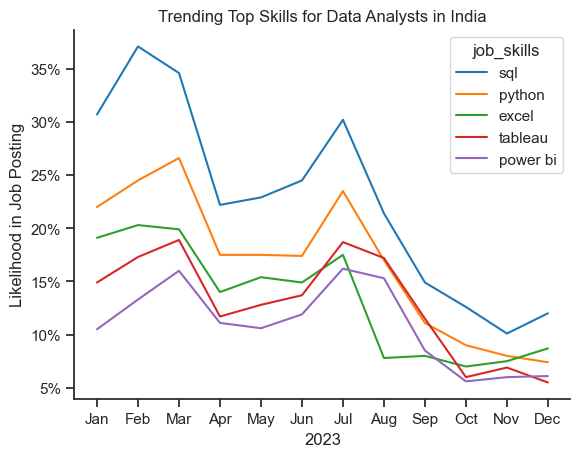

In [152]:
from matplotlib.ticker import PercentFormatter

df_plot=df_DA_pivot.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in India')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
# plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1000, decimals=0))

# for i in range(5):
#     plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()